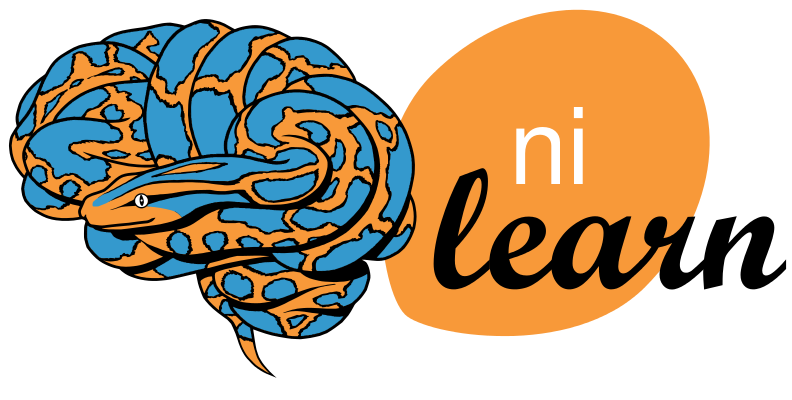

In [1]:
from IPython.display import Image
Image(filename='../images/nilearn-logo.png') 

# Introduction

In this tutorial, we'll see how `nilearn` allows us to easily perform machine learning analyses with neuroimaging data, specifically MRI and fMRI. It is meant for people who do not necessarily have a background in programming.

You may notice that the name `nilearn` is reminiscent of [`scikit-learn`](https://scikit-learn.org), a popular Python library for machine learning.

This is no accident!

Nilearn and scikit-learn were created by the same team, and nilearn is designed to bring machine **LEARN**ing to the NeuroImaging (**NI**) domain.

## Outline

During this tutorial we will go over three Jupyter notebooks:

- **Part 1: Introduction (current notebook)**
    
    - <a href="#setup">Getting set up</a>
    - <a href="#python">Use Python in a Jupyter notebook</a>
    - <a href="#hello-world">Hello World" of Nilearn: loading and plotting an image</a>
    - <a href="#smoothing">Run some manipulations</a>

- **Part 2: Creating and viewing a connectome with Nilearn**

See notebook `02-data-structures`.

- **Part 3: Run a classification task with Nilearn**

See notebook `03-classification-example`.

<div class="alert alert-block alert-info">
<b>Tip:</b>There are lots of fantastic tutorials on the <a href="https://nilearn.github.io">Nilearn website</a>. Learning to use Nilearn almost certainly starts here!
</div>

<div class="alert alert-block alert-success">
<b>Remember:</b> Don't be afraid to ask questions! And keep in mind that nobody ever writes error-free code!
</div>

<span id="setup"></span>

## Getting setup

### Running the tutorial notebooks on your machine

To be able to run the tutorial materials we need a few things:

- **Python 3:** Most recent systems come with Python pre-installed. However, depending on your system, you might still have python 2 as your default Python.

<div class="alert alert-block alert-danger">
<b>Danger:</b> Nilearn does not support Python 2 anymore, so make sure to have Python 3 installed.
</div>

- **pip:** `pip` is the standard package manager for Python. It is a very powerful tool to manage your python packages. You can learn more on pip [here](https://realpython.com/what-is-pip/).

<div class="alert alert-block alert-info">
<b>Tip:</b> If you want to check whether you have pip installed:

**Linux:**

```
$ python -m pip --version
pip X.Y.Z from .../site-packages/pip (python X.Y)
```

**Windows:**

```
C:\> py -m pip --version
pip X.Y.Z from ...\site-packages\pip (python X.Y)
```
</div>

- **git:** `git` is the most popular VCS (version controlled software). Although we recommand having `git` installed to download these notebooks, you can also use the download button on GitHub. You can learn more on `git` [here](https://git-scm.com/book/en/v2/Getting-Started-What-is-Git%3F).


#### The easy case

If you have these tools installed, you can download the repository with the notebooks:

```
$ git clone git@github.com:NicolasGensollen/nilearn-tutorial-EUGLOH-2021.git
$ cd nilearn-tutorial-EUGLOH-2021
```

Install the requirements (this will install nilearn and its dependencies, as well as Jupyter-lab):

```
$ pip install -r requirements.txt
```

Launch the notebooks:
    
```
$ cd Notebooks
$ jupyter-lab
```

#### The harder case 
    
If you don't have these tools installed already, we recommand to rely on [anaconda](https://www.anaconda.com/products/individual). `Anaconda` is a distribution of the Python programming languages for scientific computing which aims at simplifying package management and deployment. The distribution includes data-science packages suitable for Windows, Linux, and macOS.

Once you have downloaded and installed anaconda, you can create a new virtual environment dedicated to nilearn:

```
$ conda create -n nilearn python=3.9
$ conda activate nilearn
```

You can then go back to the "The easy case" section and follow the instructions.

### Running the turorial notebooks online
   
Alternatively, you can run the notebooks online via Binder by clicking this [link](https://mybinder.org/v2/gh/NicolasGensollen/nilearn-tutorial-EUGLOH-2021/HEAD) or clicking the Binder badge at the top of the README file on GitHub.

If everything went well you should be able to run the following cell:

In [2]:
import nilearn
nilearn.__version__

'0.8.1.dev'

Make sure you see a version >= 0.7.0.

<span id="python"></span>

## Use Python in a Jupyter notebook

If this is your first time using a notebook, take some time to familiarize yourself with the environment. 

You can quickly check the following tutorials to learn more about notebooks:

- [https://www.dataquest.io/blog/jupyter-notebook-tutorial/](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
- [https://realpython.com/jupyter-notebook-introduction/](https://realpython.com/jupyter-notebook-introduction/)

Feel free to try some code in the next cell:

In [3]:
# Let's use this space to play a bit with Jupyter
1 + 1

2

In [4]:
# Do not print warnings to prettify the ouputs
import warnings
warnings.filterwarnings("ignore")

<span id="hello-world"></span>

## Basic nilearn example: manipulating and looking at data

We are now ready to use nilearn. The "Hello World" of nilearn consists in loading a volume and visualize it. 

Nilearn provides some utilities to facilitate the download of classic datasets. These functions are part of the [`datasets`](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets) module of Nilearn and all start with `fetch_`. 

For example, the function [`nilearn.datasets.fetch_atlas_harvard_oxford`](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_harvard_oxford.html) downloads the HarvardOxford atlas.

Nilearn is also shipped with some minimal data, for example the MNI 152 template:

In [5]:
# Let's use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: %r' % MNI152_FILE_PATH)

Path to MNI152 template: '/home/nicolas/GitRepos/nilearn-fork/nilearn/datasets/data/avg152T1_brain.nii.gz'


As you can see `MNI152_FILE_PATH` is nothing more than a Python string pointing to a file within the nilearn folder. We didn't download anything new here, the template is shipped with the nilearn source code.

In order to visualize the image stored at this location, we are going to use the [`plot_img`](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_img.html) function from the [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting) module of Nilearn. 

Note that all functions related to visualization are defined in this module.

Let's quickly plot this file:

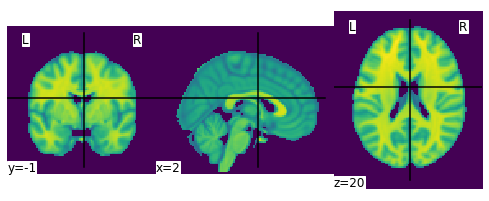

In [6]:
from nilearn import plotting
plotting.plot_img(MNI152_FILE_PATH)

<span id="smoothing"></span>

As you probably imagine, a lot is happening under the hood here. We just passed a string representing the path to our image and [`plot_img`](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_img.html) took care of everything like loading the image in memory, finding the best cuts to display and so on...

## Simple image manipulation: smoothing

Now that we know how to visualize an image stored on disk, let's go a little bit further and do some manipulation to this image before plotting it. 

Nilearn has an [`image`](https://nilearn.github.io/modules/reference.html#module-nilearn.image) module which contains all functions related to image manipulations (loading, saving, indexing, resampling, and much more...). 

In this simple example, we are going to use an image-smoothing function from this module: [`nilearn.image.smooth_img`](https://nilearn.github.io/modules/generated/nilearn.image.smooth_img.html)

First we import the [`image`](https://nilearn.github.io/modules/reference.html#module-nilearn.image) module:

In [7]:
from nilearn import image

In a Jupyter notebook, you can very easily query the documentation using the magic command "?" that you prepend to the name of the function: 

In [8]:
?image.smooth_img

Signature: image.smooth_img(imgs, fwhm)
Docstring:
Smooth images by applying a Gaussian filter.

Apply a Gaussian filter along the three first dimensions of `arr`.
In all cases, non-finite values in input image are replaced by zeros.

Parameters
----------
imgs : Niimg-like object or iterable of Niimg-like objects
    Image(s) to smooth (see
    http://nilearn.github.io/manipulating_images/input_output.html
    for a detailed description of the valid input types).

fwhm : scalar, :class:`numpy.ndarray`, 'fast' or None
    Smoothing strength, as a Full-Width at Half Maximum (FWHM), in
    millimeters.
    If a scalar is given, width is identical on all three
    directions. A :class:`numpy.ndarray` must have 3 elements, giving the FWHM
    along each axis.
    If `fwhm='fast'`, a fast smoothing will be performed with
    a filter [0.2, 1, 0.2] in each direction and a normalisation
    to preserve the scale.
    If `fwhm` is None, no filtering is performed (useful when just removal
    o

Looking at the docstring, we see that this function expects:

- an image (or list of images), which can be either a filename or an in-memory image
- and the smoothing value in mm

In [9]:
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

Note that while we are giving a file name as input, the function returns an in-memory object:

In [10]:
smooth_anat_img

This is an in-memory object. As opposed to the path representation, we can query the object attributes:

In [11]:
# Get the affine of the image
smooth_anat_img.affine

array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [12]:
# The image data is a 3D Numpy array
# containing 753571 values 
smooth_anat_img.dataobj.shape

(91, 109, 91)

<div class="alert alert-block alert-warning">
<b>Warning:</b> It is important to keep in mind the memory footprint of loaded images as opposed to string representations.
</div>

Note that we can pass it to any nilearn function like we would a string representation, for instance to look at it:

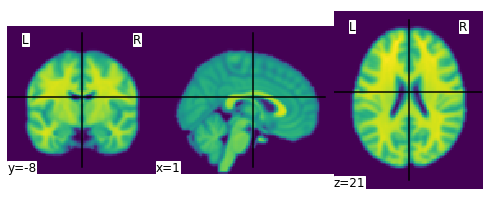

In [13]:
plotting.plot_img(smooth_anat_img)

## Conclusion

We reached the end of this first Notebook which helped us to get setup and install Nilearn. 

We learned how to load an image, perform some basic manipulation, and visualize it. By doing so, we discovered the following modules of Nilearn: 

- [`datasets`](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets): Contains all utilities to load data
- [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting): Contains all utilities to visualize images
- [`image`](https://nilearn.github.io/modules/reference.html#module-nilearn.image): Contains all utilities to manipulate images

There exists many more modules in Nilearn. We will use some of them in the next parts.

<div class="alert alert-block alert-info">
<b>Tip:</b>Note that you can always refer to the <a href="https://nilearn.github.io/modules/reference.html">API documentation</a> of Nilearn. This is a tool that all users of Nilearn refer to, so do not hesitate to use it!
</div>